# Задание 1
## Ваш продукт - это школа английского языка Лендинг для языковой школы. Проанализируйте конкурентов на рынке (SkyEng, Lingvoleo и прочие) и сформулируйте гипотезу по улучшению первого экрана лендинг.

**Анализ конкурентов**

Проанализировав первые экраны лендингов языковых школ, можно выделить следующие общие тенденции:

* **На первом экране обязательно присутствует яркая и броская шапка, которая привлекает внимание и побуждает пользователя узнать больше о школе.** Обычно в шапке содержится слоган школы, призыв к действию и информация о том, чему можно научиться в школе.
* **В большинстве случаев на первом экране представлена информация о преимуществах обучения в школе.** Это могут быть такие преимущества, как опытные преподаватели, гибкая система обучения, доступные цены и т.д.
* **Также на первом экране часто можно увидеть отзывы студентов или результаты исследований, которые подтверждают эффективность обучения в школе.**

**Гипотеза по улучшению первого экрана лендинга**

На основе анализа конкурентов можно сформулировать гипотезу по улучшению первого экрана лендинга языковой школы:

**Добавить на первый экран call to action, который побуждает пользователя оставить заявку на пробный урок.**

Этот call to action должен быть максимально заметным и привлекательным, чтобы пользователь сразу понял, что ему нужно сделать, чтобы начать обучение.

**Пример такого call to action:**


Хотите начать учить английский уже сегодня?
Оставьте заявку на пробный урок и убедитесь, что наше обучение подходит вам!


Такой call to action может быть оформлен в виде кнопки, всплывающего окна или формы обратной связи.

**Дополнительные идеи по улучшению первого экрана лендинга:**

* **Добавить на первый экран видео, которое рассказывает о школе и ее преимуществах.**
* **Использовать инфографику или другие визуальные элементы, которые помогут наглядно представить информацию о школе.**
* **Добавить на первый экран раздел с вопросами и ответами, которые часто задают потенциальные ученики.**

Внедрение этих изменений может помочь улучшить конверсию первого экрана лендинга и привлечь больше потенциальных учеников.

# Задание 2
## Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск: Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите менеджеру?

In [ ]:
from google.colab import drive
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.warn("DelftStack")
warnings.warn("Do not show this message")

In [ ]:
drive.mount("/content/drive")
data_path = "/content/drive/My Drive/Data/"
df = pd.read_csv(data_path + "ab_stats.csv")

df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
5,0.0,0,0,A,9.578727
6,0.0,0,0,A,6.162601
7,0.0,0,0,A,11.909452
8,0.0,0,0,A,6.540910
9,0.0,0,0,A,7.990794


In [ ]:
df.ab_group.value_counts() # Подсчитать количество наблюдений в каждой группе

A    11835
B    11817
Name: ab_group, dtype: int64

In [ ]:
# Описательная статистика выручки по выборкам с покупкой
df[df['purchase'] == 1].groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,256.0,18.698469,87.527589,0.259689,2.318301,4.28316,11.923141,1303.609284
B,234.0,12.362119,19.007065,0.259373,2.319883,3.98000,12.274829,113.830000


In [ ]:
# Оценка нормальности распределения значений выручки в группах < 5000
# с помощью критерия Шапиро-Уилка
alpha = 0.05

stA = shapiro(df[(df['ab_group'] == 'A')&(df['purchase'] == 1)]['revenue'])
print('Распределение группы A {}нормальное\n'.format( {True:'не ',
False:''}[stA[1] < alpha]));

stB = shapiro(df[(df['ab_group'] == 'B')&(df['purchase'] == 1)]['revenue'])
print('Распределение группы B {}нормальное\n'.format( {True:'не ',
False:''}[stB[1] < alpha]));

Распределение группы A не нормальное

Распределение группы B не нормальное



In [ ]:
# Используем тест Манна-Уитни
mw_stats = mannwhitneyu(x=df[(df['ab_group'] == 'A')&(df['purchase'] == 1)]['revenue'].values,
                                                  y=df[(df['ab_group'] == 'B')&(df['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

p-value в тесте U Манна-Уитни - это вероятность того, что различия между двумя выборками могли возникнуть случайно, если предположить, что они происходят из одной и той же генеральной совокупности.

В данном случае p-value равно 0.88719. Это означает, что вероятность того, что различия между двумя выборками могли возникнуть случайно, составляет 88.719%.

Таким образом, при уровне значимости 0.05 (типичном для большинства статистических исследований) мы не можем отвергнуть нулевую гипотезу о том, что различия между двумя выборками случайны.

Вывод:
В более простой форме это означает, что мы не можем с уверенностью сказать, что различия между двумя выборками являются статистически значимыми. Рекомендуется не вносить тестируемое изменение.

# Задание 3
##  Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%, мы ожидаем прирост в 0,2%. Уровень доверия 97% и уровень мощности 87%. Всего на наш продукт заходит 40 000 пользователей в месяц.

### 3.1) За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по результатам подсчета?

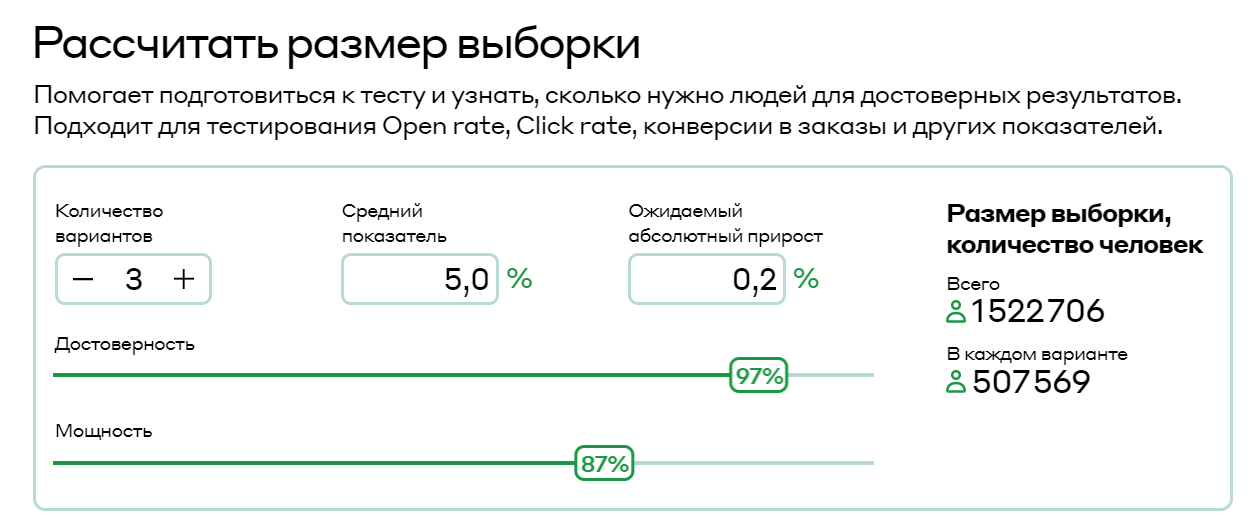

Посетителей в день: 40000 / 30 = 1333.

Количество дней для проверки гипотезы: 1522706 / 1333 = 1142
Для проверки гипотезы нам понадобится 1142 дня.

Очень большая длительность проверки гипотезы, рекомендуется уменьшить количество источников трафика, либо параметры для проверки.

### 3.2) Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите результаты тестирования, если у нас следующие результаты по количеству конверсии: 1) 25 000 2) 30 000 3) 32 000

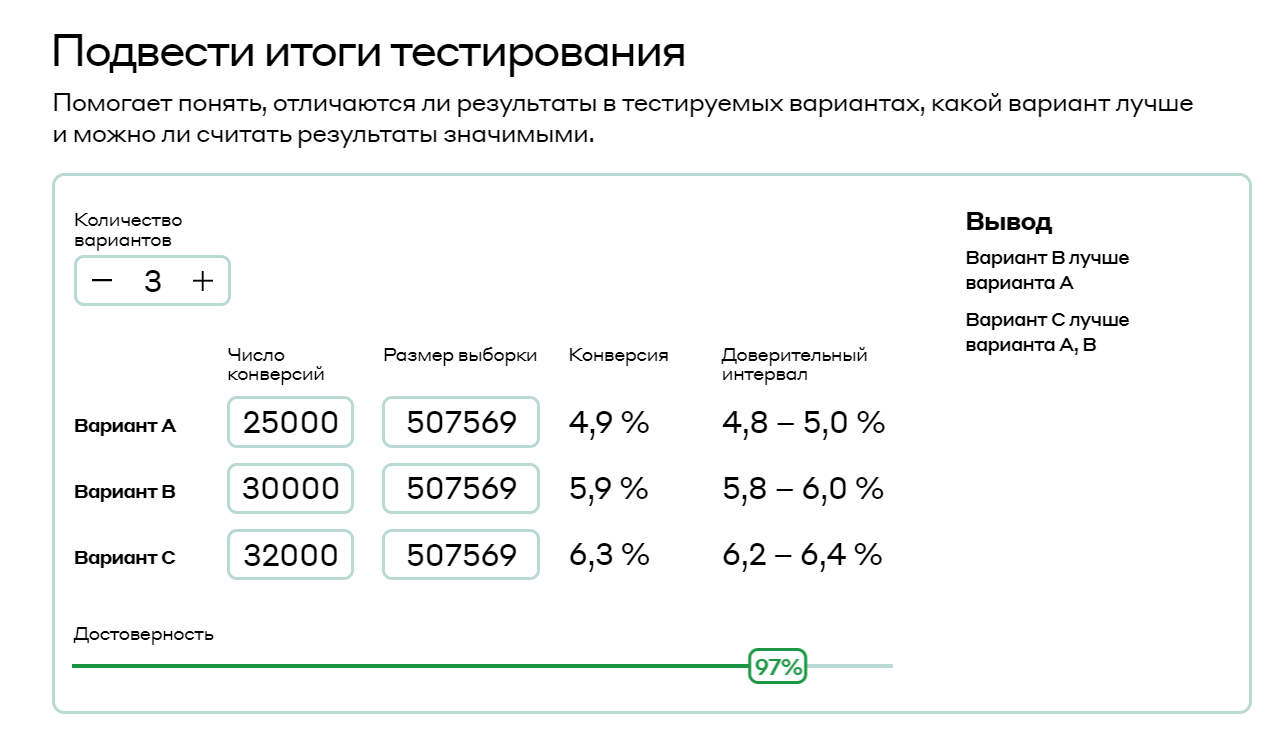

Вывод: Вариант 3 лучше вариантов, 1 и 2.

# Задание 4
## Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в каждой группе. Для проверки нормальности распределения на выборке в 2350 наблюдений применили , критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%. Какой бы вывод мы могли сделать в данном случае? В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше всего подойдёт и почему ?

В данном случае мы можем сделать вывод о том, что распределение CPA в обеих группах не является нормальным. P-value, равное 0.00002, меньше уровня значимости 0.05, что означает, что вероятность получить такое значение p-value или более экстремальное при условии, что распределение нормальное, составляет менее 0.00002. Поэтому мы можем отвергнуть нулевую гипотезу о нормальности распределения CPA в обеих группах.

В этом случае для проверки первоначальной гипотезы о равенстве средних значений CPA в двух группах лучше всего использовать непараметрический критерий, такой как критерий Манна-Уитни. Это связано с тем, что мы не можем предположить, что распределение CPA в обеих группах нормальное. Критерий Манна-Уитни не требует предположения о нормальности распределения, поэтому он является более надежным в данном случае.

Если бы мы могли предположить, что распределение CPA в обеих группах нормальное, то для проверки первоначальной гипотезы можно было бы использовать параметрический критерий, такой как t-тест для независимых выборок. Однако, учитывая результаты теста Шапиро-Уилка, мы не можем сделать такое предположение.

# Задание 5
## Мы провели АБ-тест на увеличение average timespent  per user. По итогам тестирования мы получили следующие данные. Является ли результат статистически значимым с уровнем доверия 80%? Какую версию мы выкатим на продакшн? A) Средняя - 360, отклонение - 40, количество - 9802 B) Средняя - 352, отклонение - 58, количество - 9789

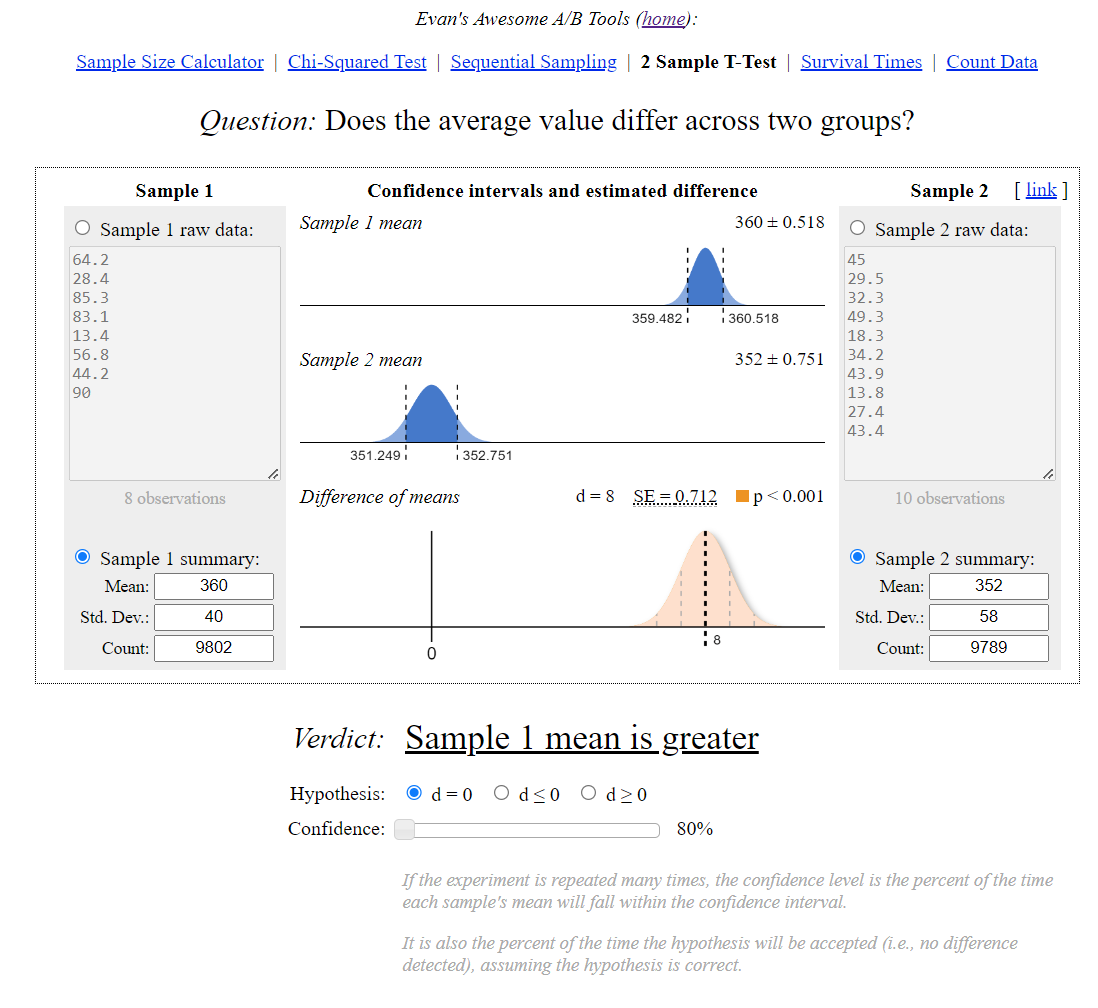

Среднее  в выборке 1 > среднего в выборке 2. Версия 1 предпочтительнее.

# Задание 5
## Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра с учетом кросс-девайс аналитики по следующей гипотезе: Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны пользователя. На схеме необходимо отобразить:

1) Управленческий процесс по договоренностям с внешними партнерами

2) Архитектуру данных с указанием систем, из которых будем скачивать данные

3) Внутрикомандное взаимодействие

**Управленческий процесс по договоренностям с внешними партнерами**

* **Согласование гипотезы с бизнесом**
* **Разработка плана по договоренностям с внешними партнерами**
* **Утверждение плана бизнесом**
* **Контакты с банком**
* **Подписание договора с банком**
* **Разработка механики кэшбэка**
* **Интеграция механики кэшбэка с системами кинотеатра**

**Архитектура данных**

* **Система кинотеатра**
    * Данные о пользователях:
        * Идентификатор пользователя
        * Демографические данные
        * История просмотров
    * Данные о покупках:
        * Тип покупки
        * Дата покупки
        * Сумма покупки
* **Система банка**
    * Данные о транзакциях:
        * Идентификатор транзакции
        * Дата транзакции
        * Сумма транзакции
        * Тип транзакции

**Внутрикомандное взаимодействие**

* **Команда по продукту**
    * Отвечает за разработку гипотезы, механики кэшбэка и интеграцию ее с системами кинотеатра
* **Команда по маркетингу**
    * Отвечает за запуск рекламной кампании для привлечения пользователей к тестированию
* **Команда по аналитике**
    * Отвечает за сбор и анализ данных для оценки эффективности теста

**Схема**

```
[Управленческий процесс]

Бизнес
    ||
    |Гипотеза|
    ||
    |План|
    ||
    |Утверждение|
    ||
    |Банк|
    ||
    |Договор|
    ||
    |Механика|
    ||
    |Интеграция|

[Архитектура данных]

Система кинотеатра
    ||
    |Пользователи|
    ||
    |Покупки|
    ||

Система банка
    ||
    |Транзакции|
    ||

[Внутрикомандное взаимодействие]

Команда по продукту
    ||
    |Гипотеза|
    ||
    |Механика|
    ||

Команда по маркетингу
    ||
    |Рекламная кампания|
    ||

Команда по аналитике
    ||
    |Данные|
    ||
    |Анализ|
```

**Описание схемы**

* **Управленческий процесс**
    * На этом этапе бизнес согласовывает гипотезу и разрабатывает план по ее реализации. Затем план утверждается бизнесом и команда начинает переговоры с банком. После подписания договора с банком команда разрабатывает механику кэшбэка и интегрирует ее с системами кинотеатра.
* **Архитектура данных**
    * Для проведения теста необходимо собрать данные о пользователях, их покупках и транзакциях. Эти данные будут поступать из систем кинотеатра и банка.
* **Внутрикомандное взаимодействие**
    * Команда по продукту отвечает за разработку гипотезы, механики кэшбэка и интеграцию ее с системами кинотеатра. Команда по маркетингу отвечает за запуск рекламной кампании для привлечения пользователей к тестированию. Команда по аналитике отвечает за сбор и анализ данных для оценки эффективности теста.

**Дополнительные комментарии**

* Для проведения теста необходимо будет настроить интеграцию систем кинотеатра и банка. Это может быть технически сложной задачей, поэтому необходимо предусмотреть достаточное время для ее реализации.
* Для оценки эффективности теста необходимо будет собрать достаточно данных. Это может занять несколько недель или месяцев.
* Для обеспечения достоверности результатов теста необходимо будет исключить влияние других факторов, которые могут повлиять на конверсию в подписку. Например, необходимо будет убедиться, что рекламная кампания для привлечения пользователей к тестированию не оказывает влияния на конверсию в подписку в контрольной группе.